In [34]:
import pandas as pd
import numpy as np
from sklearn import linear_model

df = pd.read_csv('work.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [35]:
df = df.rename(columns={df.columns[1]: 'test_score'})
df

,experience,test_score,interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [36]:
df = df.rename(columns={df.columns[2]: 'interview_score'})
df

,experience,test_score,interview_score,salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [37]:
df = df.rename(columns={df.columns[3]: 'salary'})
df

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [29]:
import math
test_score_median = math.floor(df.test_score.median())
test_score_median

8

In [38]:
df.test_score = df.test_score.fillna(test_score_median)
df

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [39]:
word_to_num = {
    'one': 1,
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'seven': 7,
    'eight': 8,
    'nine': 9,
    'ten': 10,
    'eleven':11,
}
df.experience = df.experience.map(word_to_num)
df

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,8.0,7,72000
7,11.0,7.0,8,80000


In [41]:
experience_median = math.floor(df.experience.median())
experience_median

6

In [42]:
df.experience = df.experience.fillna(experience_median)
df

,experience,test_score,interview_score,salary
0,6.0,8.0,9,50000
1,6.0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,8.0,7,72000
7,11.0,7.0,8,80000


In [43]:
reg = linear_model.LinearRegression()
reg.fit(df[['experience','test_score','interview_score']], df.salary)
reg

LinearRegression()

In [44]:
reg.coef_

array([2813.00813008, 1333.33333333, 2926.82926829])

In [45]:
reg.intercept_

np.float64(11869.918699186957)

In [46]:
reg.predict([[7, 9, 6]])

C:\Users\jtrip\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([61121.95121951])

In [47]:
reg.predict([[2,9,6]])

C:\Users\jtrip\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([47056.91056911])

In [48]:
reg.predict([[12,10,10]])

C:\Users\jtrip\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([88227.64227642])

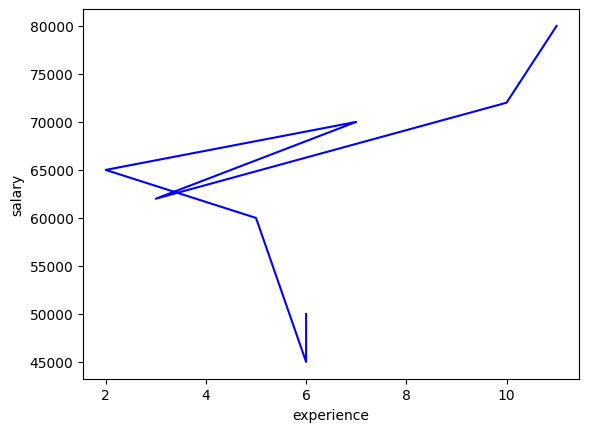

In [51]:
#miscellaneus
import matplotlib.pyplot as plt
plt.xlabel('experience')
plt.ylabel('salary')
plt.plot(df.experience, df.salary, color='blue')